In [18]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

pd.set_option('display.max_rows', None)

Source of the code: https://pbpython.com/market-basket-analysis.html

Association rules are normally written like this: {Diapers} -> {Beer} which means that there is a strong relationship between customers that purchased diapers and also purchased beer in the same transaction.

The {Diaper} is the antecedent and the {Beer} is the consequent. Both antecedents and consequents can have multiple items. In other words, {Diaper, Gum} -> {Beer, Chips} is a valid rule.

Support is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.

Confidence is a measure of the reliability of the rule. A confidence of .5 in the above example would mean that in 50% of the cases where Diaper and Gum were purchased, the purchase also included Beer and Chips. For product recommendation, a 50% confidence may be perfectly acceptable but in a medical situation, this level may not be high enough.

Lift is the ratio of the observed support to that expected if the two rules were independent (see wikipedia). The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

In [3]:
# Read data set 

df = pd.read_excel("df_retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


##### France

In [7]:
basket = (df[df["Country"] =="France"]
          .groupby(["InvoiceNo", "Description"])["Quantity"]
          .sum().unstack().reset_index().fillna(0)
          .set_index("InvoiceNo"))

In [9]:
basket.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop("POSTAGE", inplace=True, axis=1)

In [11]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [64]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102828,0.097686,0.074550,0.725000,7.421711,0.064505,3.281140
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.097686,0.102828,0.074550,0.763158,7.421711,0.064505,3.788061
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.095116,0.097686,0.079692,0.837838,8.576814,0.070400,5.564267
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.097686,0.095116,0.079692,0.815789,8.576814,0.070400,4.912229
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE PINK),0.095116,0.102828,0.074550,0.783784,7.622297,0.064770,4.149422
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.102828,0.095116,0.074550,0.725000,7.622297,0.064770,3.290488
6,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.125964,0.100257,0.071979,0.571429,5.699634,0.059351,2.099400
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.100257,0.125964,0.071979,0.717949,5.699634,0.059351,3.098855
8,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN SPACEBOY),0.169666,0.136247,0.089974,0.530303,3.892224,0.066858,1.838958
9,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE ),0.136247,0.169666,0.089974,0.660377,3.892224,0.066858,2.444873


Interpretation row 1:

A customer is 7 times more likely to buy a ALARM CLOCK BAKELIKE GREEN than an average customer (lift) if he buys ALARM CLOCK BAKELIKE PINK. This rule is "true" in 72% of the cases (confidence). This insight might be used for a recommendation: Recommend ALARM CLOCK BAKELIKE GREEN for customer who choose/ bought the green version. 

In [54]:
#or see row 14:

#SET/6 RED SPOTTY PAPER CUPS) 	(SET/20 RED RETROSPOT PAPER NAPKINS )

In [61]:
rules[ (rules["lift"] >= 6) &
       (rules["confidence"] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.095116,0.097686,0.079692,0.837838,8.576814,0.070400,5.564267
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.097686,0.095116,0.079692,0.815789,8.576814,0.070400,4.912229
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.138817,0.128535,0.123393,0.888889,6.915556,0.105550,7.843188
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.128535,0.138817,0.123393,0.960000,6.915556,0.105550,21.529563
20,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102828,0.128535,0.100257,0.975000,7.585500,0.087040,34.858612
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS ),0.123393,0.133676,0.100257,0.812500,6.078125,0.083762,4.620394
22,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER CUPS),0.102828,0.138817,0.100257,0.975000,7.023611,0.085983,34.447301


In [25]:
basket["ALARM CLOCK BAKELIKE GREEN"].sum()

340.0

##### United Kingdom

In [29]:
basket2 = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [30]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)

In [38]:
frequent_itemsets2 = apriori(basket_sets2, min_support=0.02, use_colnames=True)

In [62]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.045536,0.041451,0.027274,0.598945,14.449321,0.025386,2.390065
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.041451,0.045536,0.027274,0.657971,14.449321,0.025386,2.790593
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037667,0.044575,0.027514,0.730463,16.387169,0.025835,3.544682
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.044575,0.037667,0.027514,0.617251,16.387169,0.025835,2.514265
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029617,0.036766,0.024270,0.819473,22.289120,0.023181,5.335669
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.036766,0.029617,0.024270,0.660131,22.289120,0.023181,2.855166
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.040731,0.036766,0.028595,0.702065,19.095706,0.027098,3.233034
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.036766,0.040731,0.028595,0.777778,19.095706,0.027098,4.316713
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.055749,0.047519,0.023910,0.428879,9.025442,0.021261,1.667740
9,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.047519,0.055749,0.023910,0.503161,9.025442,0.021261,1.900515


In [63]:
rules2[ (rules2['lift'] >= 6) &
       (rules2['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037667,0.044575,0.027514,0.730463,16.387169,0.025835,3.544682
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029617,0.036766,0.024270,0.819473,22.289120,0.023181,5.335669
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.040731,0.036766,0.028595,0.702065,19.095706,0.027098,3.233034
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.036766,0.040731,0.028595,0.777778,19.095706,0.027098,4.316713
63,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029617,0.040731,0.023009,0.776876,19.073573,0.021802,4.299271
70,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023009,0.036766,0.020485,0.890339,24.216650,0.019639,8.783780
71,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.028595,0.029617,0.020485,0.716387,24.188581,0.019638,3.421500
72,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024270,0.040731,0.020485,0.844059,20.723028,0.019497,6.151506


##### Germany

In [43]:
basket3 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [44]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets3 = basket3.applymap(encode_units)
basket_sets3.drop('POSTAGE', inplace=True, axis=1)

In [78]:
frequent_itemsets3 = apriori(basket_sets3, min_support=0.05, use_colnames=True)

In [79]:
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
2,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.115974,0.157549,0.050328,0.433962,2.754455,0.032057,1.488330
3,(ROUND SNACK BOXES SET OF 4 FRUITS ),(PLASTERS IN TIN CIRCUS PARADE ),0.157549,0.115974,0.050328,0.319444,2.754455,0.032057,1.298977
4,(ROUND SNACK BOXES SET OF4 WOODLAND ),(PLASTERS IN TIN CIRCUS PARADE ),0.245077,0.115974,0.056893,0.232143,2.001685,0.028470,1.151290
5,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.115974,0.245077,0.056893,0.490566,2.001685,0.028470,1.481887
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.137856,0.107221,0.061269,0.444444,4.145125,0.046488,1.607002
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
8,(ROUND SNACK BOXES SET OF4 WOODLAND ),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951
9,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006


In [66]:
rules3[ (rules3['lift'] >= 6) &
       (rules3['confidence'] >= 0.7) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037667,0.044575,0.027514,0.730463,16.387169,0.025835,3.544682
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029617,0.036766,0.024270,0.819473,22.289120,0.023181,5.335669
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.040731,0.036766,0.028595,0.702065,19.095706,0.027098,3.233034
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.036766,0.040731,0.028595,0.777778,19.095706,0.027098,4.316713
63,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029617,0.040731,0.023009,0.776876,19.073573,0.021802,4.299271
70,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023009,0.036766,0.020485,0.890339,24.216650,0.019639,8.783780
71,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.028595,0.029617,0.020485,0.716387,24.188581,0.019638,3.421500
72,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024270,0.040731,0.020485,0.844059,20.723028,0.019497,6.151506


#### Germany with filter 

In [80]:
retail_filtered = df[df['Country']=="Germany"]

In [90]:
basket4 = (retail_filtered[retail_filtered['Quantity']<10]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [91]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets4 = basket4.applymap(encode_units)
basket_sets4.drop('POSTAGE', inplace=True, axis=1)

In [92]:
frequent_itemsets4 = apriori(basket_sets4, min_support=0.05, use_colnames=True)

In [93]:
rules4 = association_rules(frequent_itemsets4, metric="lift", min_threshold=1)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.130435,0.102975,0.057208,0.438596,4.259259,0.043777,1.597826
1,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.102975,0.130435,0.057208,0.555556,4.259259,0.043777,1.956522


### RFM Segmentation with Score

- Simple calcuation of a RFM score by dividing the customers into quartiles for each of the variables Frequency, Monetary, Recency. 
- The number of the quartiles are concettinated to a segment number. 
- The sum of a segment number gives us the RFM score. The maximum possible RFM score is 12 (4+4+4)
- RFM score are again divided into four quartiles in order to give us customer segmentation classes


In [17]:
df = pd.read_excel("df_merge.xlsx")
# code source: kaggle.com/aishwaryasarkar/segmentation-cohort-rfm-analysis-k-means

In [21]:
df.head()

,CustomerID,Monetary,Frequency,Recency
0,12348,1797.24,31,75
1,12349,1457.55,72,19
2,12350,334.40,17,310
3,12352,2129.54,84,36
4,12353,89.00,4,204


In [59]:
# Divide each variable into four quartiles
# Change to integer, in order to sum them later

r_quartiles = pd.qcut(df["Recency"], 4, labels = range(4, 0, -1))
df = df.assign(R_quartile = r_quartiles.values.astype("int"))

f_quartiles = pd.qcut(df["Frequency"], 4, labels = range(1, 5, 1))
df = df.assign(F_quartile = f_quartiles.values.astype("int"))


m_quartiles = pd.qcut(df["Monetary"], 4, labels = range(1, 5, 1))
df = df.assign(M_quartile = m_quartiles.values.astype("int"))

df.head()

,CustomerID,Monetary,Frequency,Recency,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Segment
0,12348,1797.24,31,75,2,3,4,234,9,Loyal
1,12349,1457.55,72,19,4,4,4,444,12,Kings
2,12350,334.40,17,310,1,2,2,122,5,Needs Attention
3,12352,2129.54,84,36,3,4,4,344,11,Kings
4,12353,89.00,4,204,1,1,1,111,3,About to Churn


In [25]:
# Create RFM Segment by adding the quartile RFM values 

df["RFM_Segment"]=df["R_quartile"].astype("str") + df["F_quartile"].astype("str") + df["M_quartile"].astype("str")

# Create RFM Score by getting the digit sum of RFM Segment

df["RFM_Score"]= df[["R_quartile","F_quartile","M_quartile"]].sum(axis=1)
df.head()

,CustomerID,Monetary,Frequency,Recency,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12348,1797.24,31,75,2,3,4,234,9
1,12349,1457.55,72,19,4,4,4,444,12
2,12350,334.40,17,310,1,2,2,122,5
3,12352,2129.54,84,36,3,4,4,344,11
4,12353,89.00,4,204,1,1,1,111,3


In [36]:
# The maximum score possible is 12. Let´s again divide the scores in quartiles. This is how we find our final Segment. Give them a specific label

def segment(a):
    if a >9:
        return "Kings"
    elif (a>6) & (a<=9):
        return "Loyal"
    elif (a>3) & (a<=6):
        return "Needs Attention"
    elif (a>0) & (a<=3):
        return "About to Churn"

In [37]:
df["Segment"]=df["RFM_Score"].apply(segment)
df.head()

,CustomerID,Monetary,Frequency,Recency,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,Segment
0,12348,1797.24,31,75,2,3,4,234,9,Loyal
1,12349,1457.55,72,19,4,4,4,444,12,Kings
2,12350,334.40,17,310,1,2,2,122,5,Needs Attention
3,12352,2129.54,84,36,3,4,4,344,11,Kings
4,12353,89.00,4,204,1,1,1,111,3,About to Churn


##### Mean RFM Values per Segment

In [38]:
df_reset= df.reset_index()
segmentation =df_reset.groupby(["Segment"])\
        .agg({"Recency": 'mean",
                      "Frequency": "mean",
                      "Monetary": "mean"}).round(2)
print(segmentation,'\n')

                 Recency  Frequency  Monetary
Segment                                      
About to Churn    275.61       6.99    137.67
Kings              30.40      88.28   1317.94
Loyal              84.44      41.28    670.91
Needs Attention   155.61      16.51    294.89 



In [39]:
print(df["Segment"].value_counts())

Loyal              1163
Needs Attention    1099
Kings               980
About to Churn      284
Name: Segment, dtype: int64


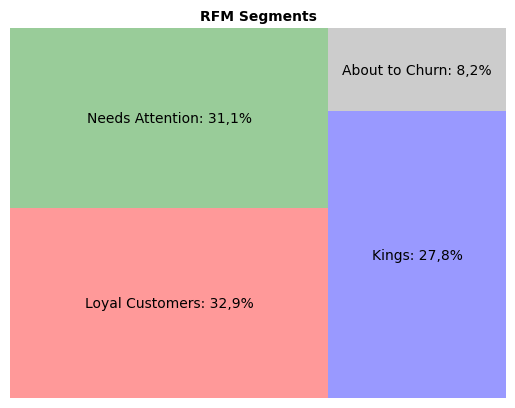

In [57]:
import matplotlib.pyplot as plt
import squarify  
import pandas as pd

squarify.plot(sizes=[1163,1099,980,284], label=["Loyal Customers: 32,9%", "Needs Attention: 31,1%", "Kings: 27,8%", "About to Churn: 8,2%"], color=["red","green","blue", "grey"], alpha=.4 )
plt.axis("off")
plt.title("RFM Segments",fontsize=10,fontweight="bold")
plt.show()

